## Q) Predicting Survival in the Titanic Data Set

In [2]:
# importing required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import pydotplus
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [3]:
# download the dataset from url and read as csv file
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info() # gives a summary information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe() # sumary description of data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.columns # name of the features/columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.isnull().sum() #check whether any col has null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# as the number of null values are very more in cabin col and no use of ID so we will drop that cols
titanic = titanic.drop(columns=['Cabin','PassengerId','Name','Ticket','Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [9]:
titanic[titanic['Pclass']==1]['Age'].mean() # calculate the mean 

38.233440860215055

In [10]:
titanic[titanic['Pclass']==2]['Age'].mean() # calculate the mean

29.87763005780347

In [11]:
titanic[titanic['Pclass']==3]['Age'].mean() # calculate the mean

25.14061971830986

In [12]:
# function to replace the null val with avg value in Age col
def rep_nan(cols):
    Pclass = cols[0]
    age = cols[1]
    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
        else:
            return 30
    else:
        return age

In [13]:
# replace the null value in age col with avg of age in each class
titanic['Age'] = titanic[['Pclass','Age']].apply(rep_nan,axis=1)

In [14]:
titanic.isnull().sum() # again check if there is any null value 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [15]:
titanic.columns # these are the required features

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

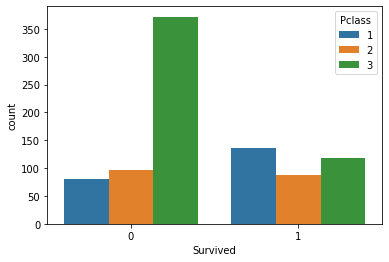

In [16]:
# ploting and visualizing the data according to class
sns.countplot(titanic['Survived'],hue='Pclass',data=titanic)

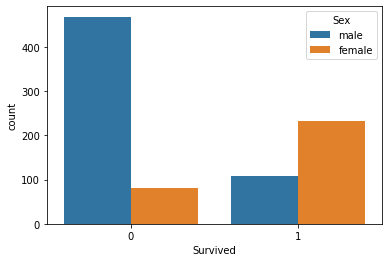

In [17]:
sns.countplot(titanic['Survived'],hue='Sex',data=titanic)

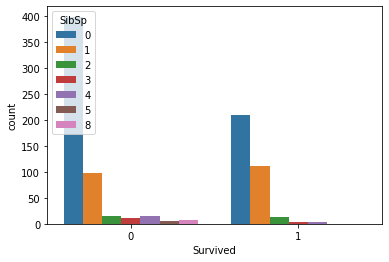

In [18]:
sns.countplot(titanic['Survived'],hue='SibSp',data=titanic)

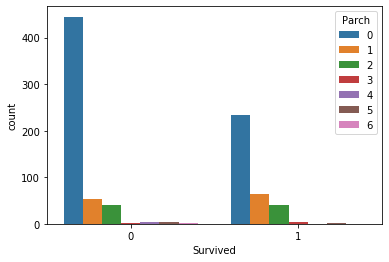

In [19]:
sns.countplot(titanic['Survived'],hue='Parch',data=titanic)

In [20]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,25.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [21]:
# the sex col is a categorical value but should to number not string so applyinh one hot encoding
Sex = pd.get_dummies(titanic['Sex'])
titanic = pd.concat([titanic,Sex],axis=1).drop(columns='Sex')

In [22]:
titanic # this is our final data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,25.0,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


In [23]:
# split the data input input and output
X = titanic.drop(columns='Survived')
Y = titanic['Survived']

In [24]:
# scaling the data
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [25]:
# Splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state= 355)

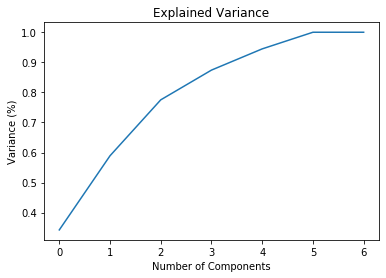

In [26]:
# Dimesionality reduction (to check minimum feature reqired ot get max accuray)
pca = PCA()
principalComponents = pca.fit_transform(x_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [27]:
# As the first 5 cols are enough to get 100% accuracy will drop the last col i.e 'male'
X = titanic.drop(columns=['Survived','male'])
X.shape

(891, 6)

In [28]:
# again scaling the new input data
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [29]:
#splitting the data into traning and testing data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state= 355)

In [30]:
#Traning the model without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.746268656716418

In [31]:
# as the accuracy is less
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(1,30,1),
    'min_samples_leaf' : range(1,20,1),
    'min_samples_split': range(1,20,1),
    'splitter' : ['best', 'random']
}

In [32]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1)

In [33]:
#calculating the best parameters
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [34]:
grid_search.best_params_ #gives the best calculated parameters

{'criterion': 'gini',
 'max_depth': 27,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'splitter': 'random'}

In [35]:
grid_search.best_score_ #gives the max accuracy we will get

0.8298322580645161

In [36]:
#Now again train the model on the best calculated model
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =27, min_samples_leaf= 5, min_samples_split= 8, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=27, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [37]:
clf.score(x_test,y_test)# check the accuracy score

0.8059701492537313

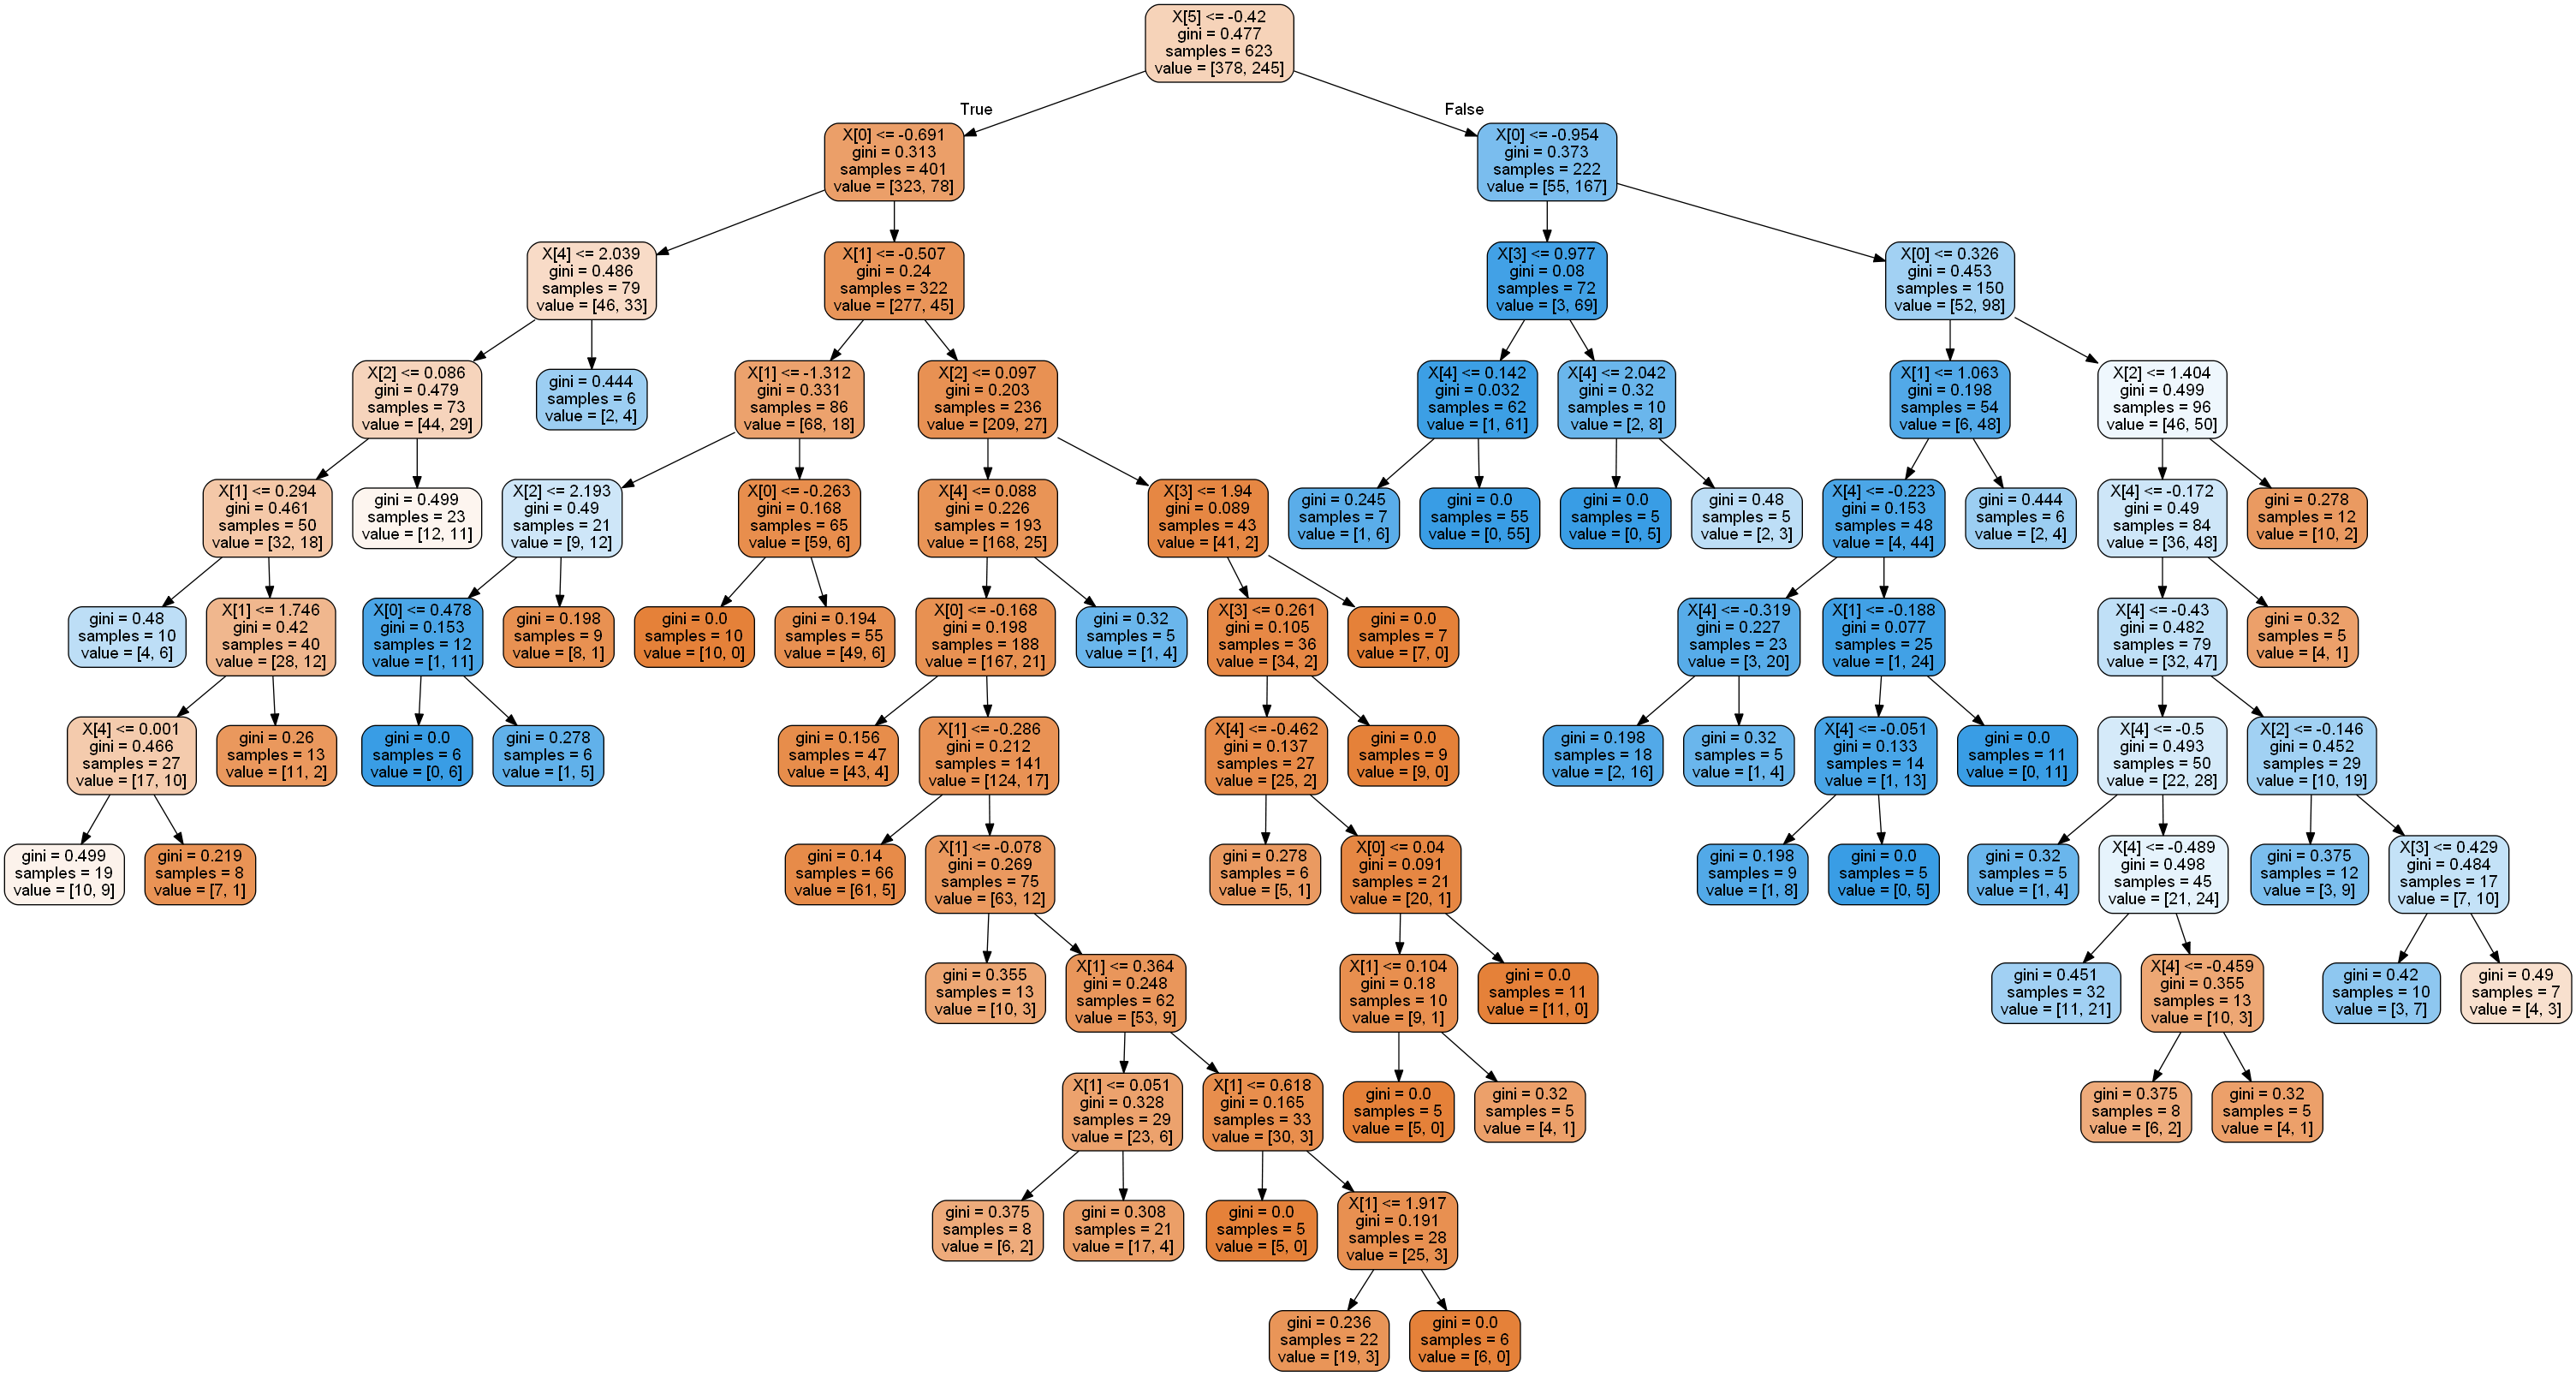

In [38]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [39]:
# save the model
with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)